In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None) # Altered default settings to view all the columns

In [2]:
dataset = pd.read_csv('data.csv') # loading the the dataset to the dataframe 
print(dataset.shape) # returns (number of rows,number of columns)

(13320, 9)


In [3]:
dataset.head() # Display 1st 5 rows of the dataset

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Computing the percentage of missing values in each column
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

size 0.0012  % missing values
society 0.4131  % missing values
bath 0.0055  % missing values
balcony 0.0457  % missing values


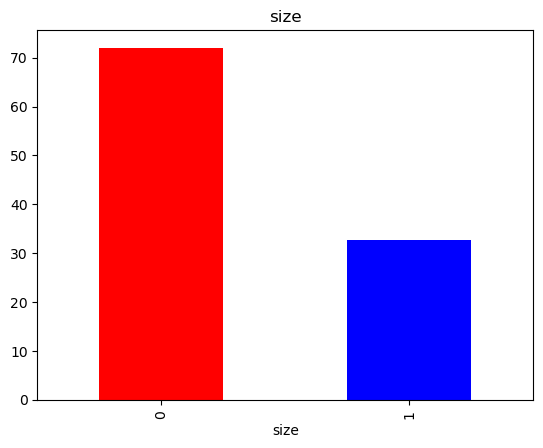

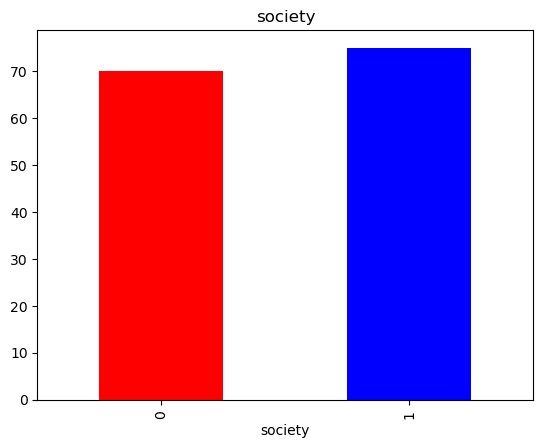

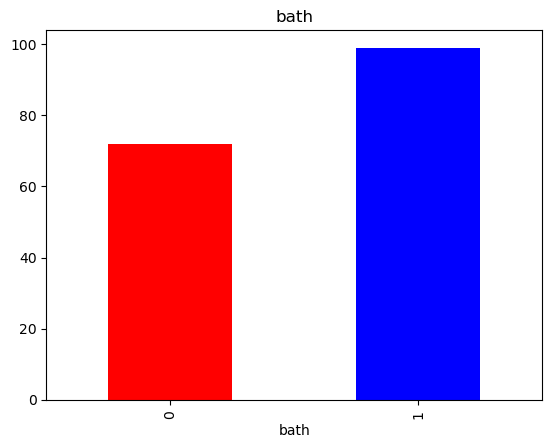

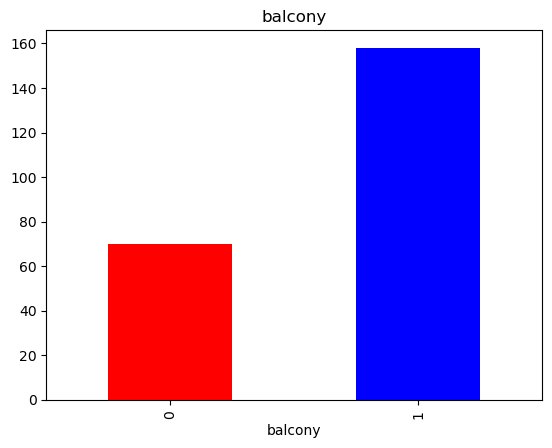

In [5]:
# Graphical representation for comparison between Null and Non-Null values with respect to the Median Price
for feature in features_with_na:
    data = dataset.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0) # 1 for Null and 0 for Non-Null
    
    data.groupby(feature)['price'].median().plot.bar(color=['red','blue']) 
    plt.title(feature)
    plt.show()

Obeservations made

1.Features with higher Median Price for Null values than Non-Null values - society,bath,balcony     
      2.Features with higher Median Price for Non-Null values than Null values - size

In [8]:
# Numerical variables

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O'] # list of numerical variables

print('Number of numerical variables: ', len(numerical_features))

# Displaying 1st 5 rows of the dataset with numerical values
dataset[numerical_features].head()

Number of numerical variables:  3


,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00


Eventhough total_sqft was supposed to be a numerical data it is not displayed here

In [10]:
# Conversion of total_sqft to numeric format
dataset['total_sqft'] = pd.to_numeric(dataset['total_sqft'], errors='coerce', downcast='integer')

In [11]:
# Runing the same code from line 7 for updating the numerical_features list 

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O'] # list of numerical variables

print('Number of numerical variables: ', len(numerical_features))

# Displaying 1st 5 rows of the dataset with numerical values
dataset[numerical_features].head()

Number of numerical variables:  4


,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00


Text(0.5, 1.0, 'House Price vs Area')

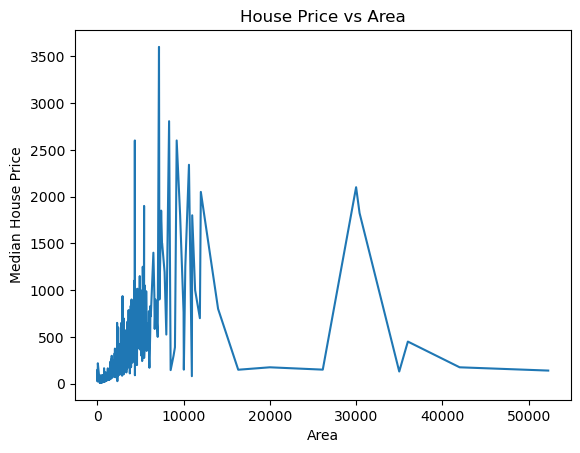

In [12]:
# Plotting between Median of House Price vs Area

dataset.groupby('total_sqft')['price'].median().plot()
plt.xlabel('Area')
plt.ylabel('Median House Price')
plt.title("House Price vs Area")

The above graph completely proves wrong our intuition that the higher the area ,the higher the price.Hence raise the importance to analyse other parameters as well

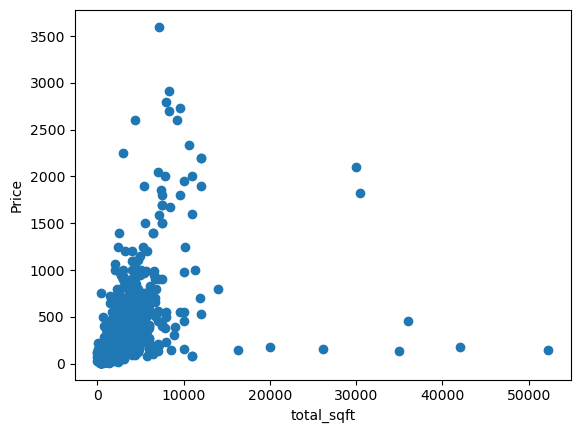

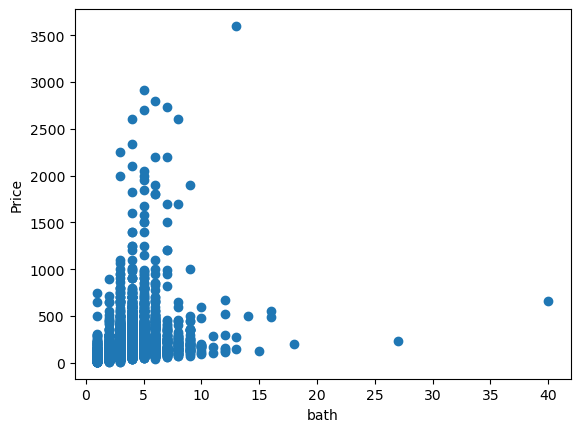

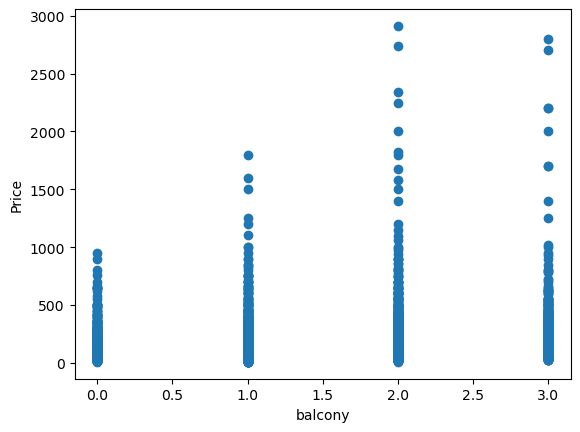

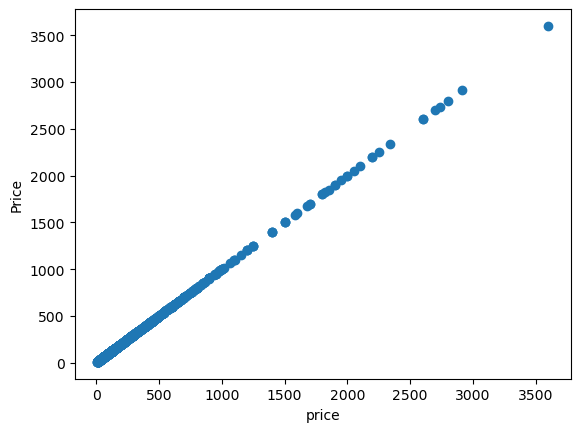

In [14]:
# Analysing relations between numerical variables and Price 
for feature in numerical_features:
    plt.scatter(dataset[feature],dataset['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

From the above graphs
1. Bath - With an increase in the number of bathrooms there isn't a significant price increase but toward the end, there is a      decrease in the price with an increase in the number of bathrooms. It is also observed that with the number of bathrooms        remaining the same, there is a gradation in price i.e., the number of bathrooms alone is not the price-determining factor.
2. Balcony - With an increase in the number of balconies there isn't a significant price increase but toward the end, there is a    decrease in the price with an increase in the number of balconies. It is also observed that with the number of balconies        remaining the same, there is a gradation in price i.e., the number of balconies alone is not the price-determining factor.


In [18]:
# Discrete Variables - Less in number of unique entries
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25 ] #Setting number of unique entries limit as 25(number of your choice but should be logical)
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [20]:
# list of discrete feature varibles
discrete_feature

['bath', 'balcony']

In [21]:
# Displaying discrete features from the dataset
dataset[discrete_feature].head()

,bath,balcony
0,2.0,1.0
1,5.0,3.0
2,2.0,3.0
3,3.0,1.0
4,2.0,1.0


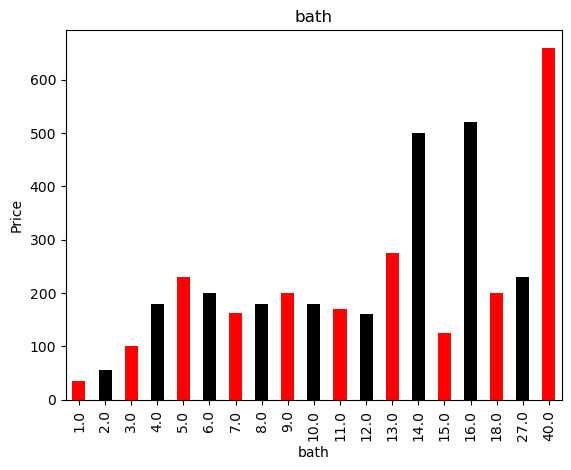

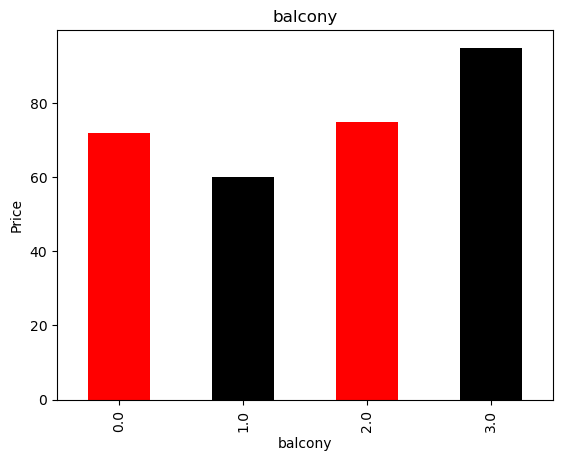

In [23]:
#Analysing the relationship between discrete variables and Median Price

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar(color =['red','black'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

Here we took Median Price in place of Actual Price for analysis

1. Bath - incase of number of bathrooms there is a gradual increase in Median price with respect to number of bathrooms
2. Balcony - incase of number of balconies there is a gradual increase in Median price with respect to number of balconies

In [24]:
# Continous Variables

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


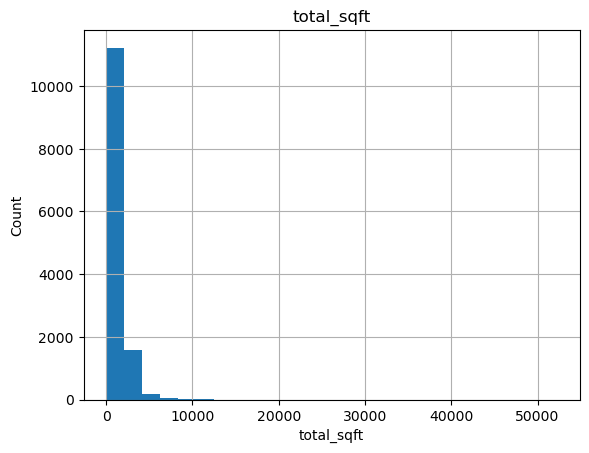

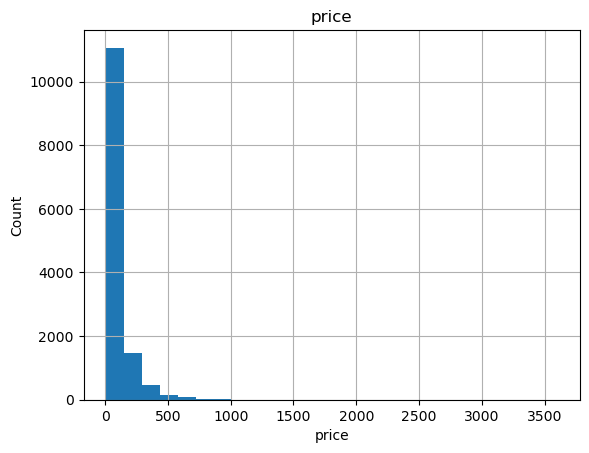

In [25]:
#Analysis of continous variables with the help of histograms 
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

The above graph(Price vs Area) shows skewness, hence we need to transform the data to log distribution for effective analysis

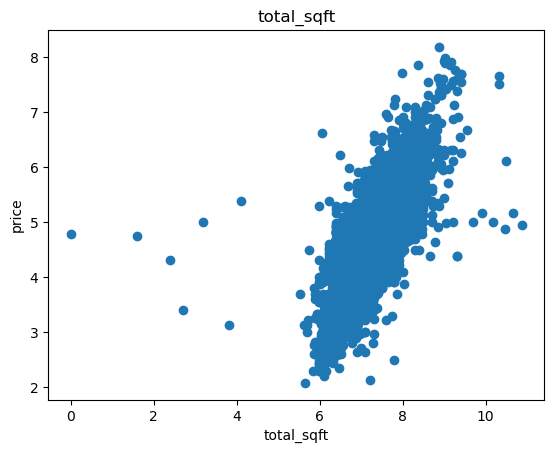

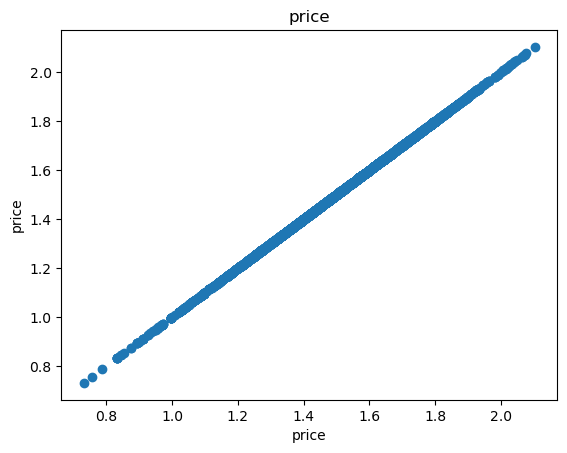

In [27]:
#Transforming to Log and plotting graphs for analysing the difference

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique(): # Since log of 0 is not defined
        pass
    else:
        data[feature]=np.log(data[feature])
        data['price']=np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

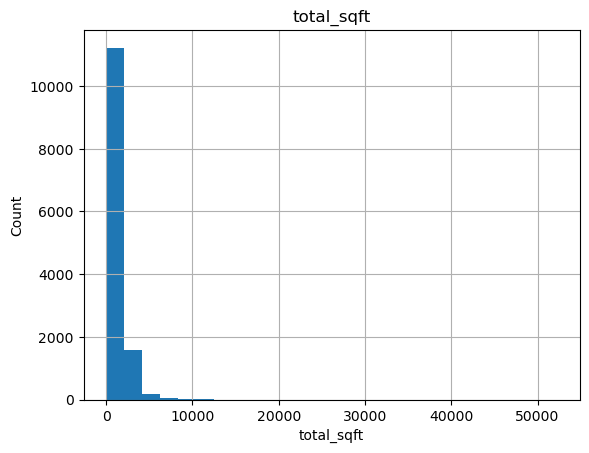

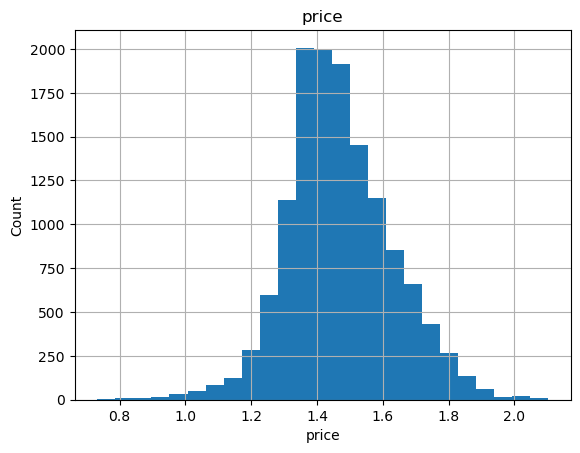

In [28]:
#Analysis through histogram after log transformation

for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

There is no significant change in the histogram plot after log tranfromation

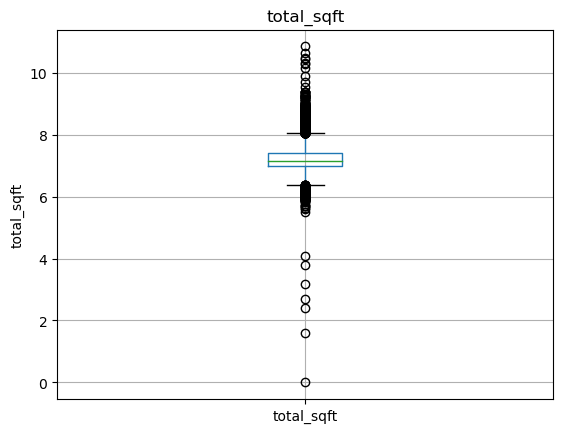

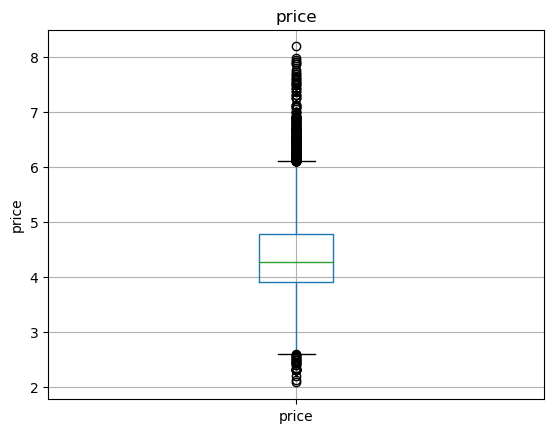

In [30]:
#Identification of Outliers using box plot

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Considering Area plot, the 1st dark black line above 6 is the 5percentile line and the ones following 25percentile(1st blue line), 50percentile(Green line), 75percentile(next blue line) and 95percentile(last dark black line).
There are so many outliers in our dataset

In [32]:
# Categorical variables
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O'] # Checking the object is string or not
categorical_features

['area_type', 'availability', 'location', 'size', 'society']

In [34]:
# Displaying categorical features from the dataset
dataset[categorical_features].head()

,area_type,availability,location,size,society
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN


In [35]:
# Number of categories inside each categorical variable 

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is area_type and number of categories are 4
The feature is availability and number of categories are 81
The feature is location and number of categories are 1306
The feature is size and number of categories are 32
The feature is society and number of categories are 2689


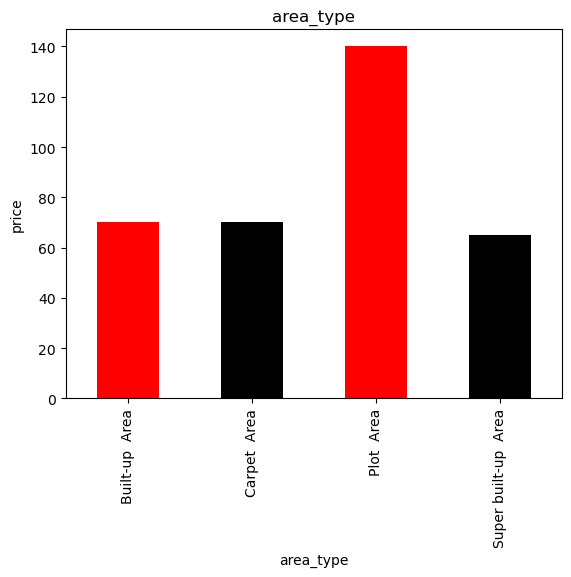

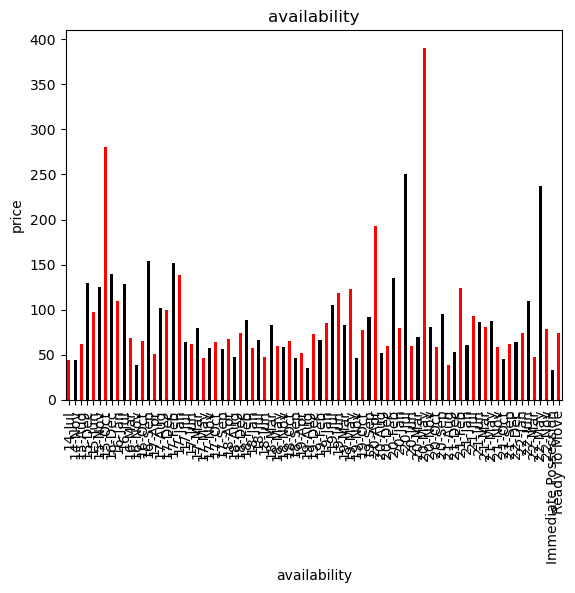

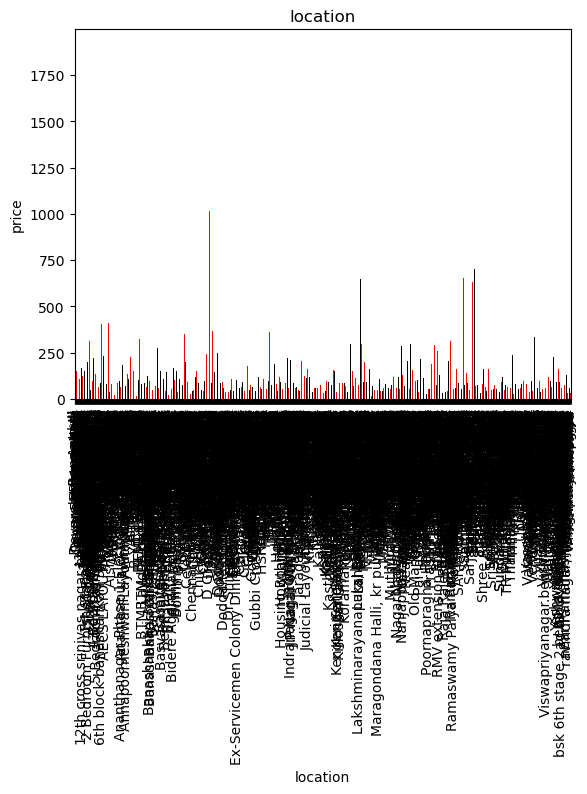

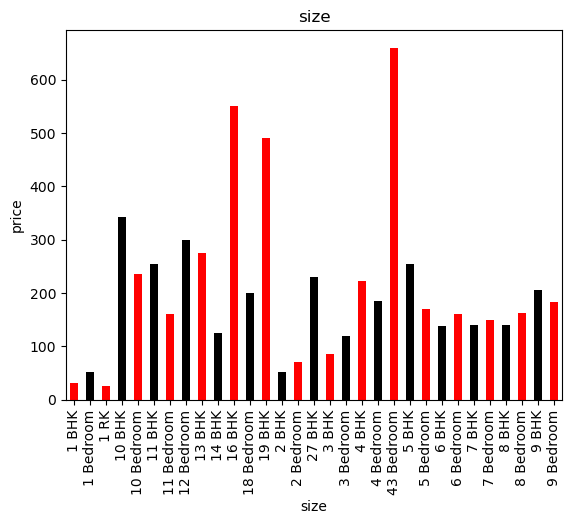

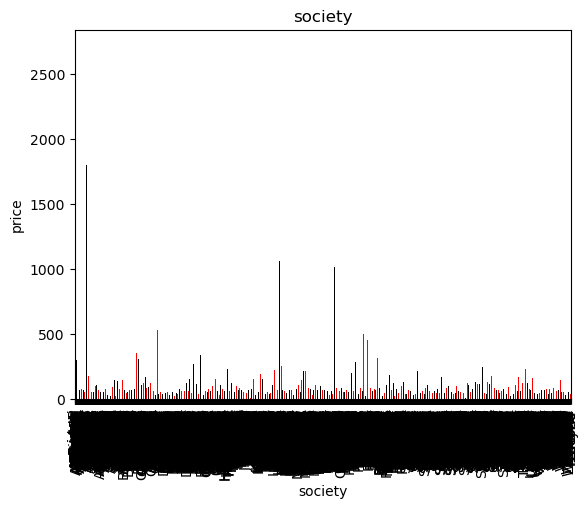

In [37]:
# Bar plots to gain valuable insights from categorical variables

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar(color =['red','black'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [38]:
#From the above graphs Area_type,Size are the significant ones
#1.Area_type - There are 4 different type of areas in the dataset which is a crucial finding i.e while modelling is done, we need to split the database on this behalf
#2.Size - Need to introduce new fields/columns such as number of bedrooms,Kitchen(yes/no),Hall(yes/no) which in turn breaks the problem to a broader perspective